In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
from collections import Counter

In [2]:
path = "/home/skand/Workspace/MIT/analytics_edge/Analytics_Edge_Tennis_prediction"
os.chdir(path)
print(os.path.abspath(os.curdir))

/home/skand/Workspace/MIT/analytics_edge/Analytics_Edge_Tennis_prediction


In [3]:
def replace_spaces_dashes(x):
    x = str(x).replace(" ","")
    x = x.replace("_","")
    x = x.replace("'","")
    return x

In [4]:
def change_round(Round):
    if Round=='1st Round':
        return 7
    if Round=='2nd Round':
        return 6
    if Round=='3rd Round':
        return 5
    if Round=='4th Round':
        return 4
    if Round=='Quarterfinals':
        return 3
    if Round=='Semifinals':
        return 2
    if Round=='The Final':
        return 1

In [5]:
odds = pd.DataFrame()
for year in range (2001,2021):
    df_date = pd.read_csv('odds_data/raw_odds/'+str(year)+'.csv')
    odds = pd.concat([odds,df_date],sort=False,ignore_index=True)

odds['Date'] = pd.to_datetime(odds['Date'])
odds['year'] = odds['Date'].dt.year
odds['Date']=odds['Date'].apply(lambda x:x.strftime('%Y-%m-%d'))
odds['tournoi_unique_id'] = odds['year'].apply(lambda x:str(x))+'-'+odds['Location'].apply(lambda x:replace_spaces_dashes(x).lower())+'-'+odds['Surface'].apply(lambda x:x.lower())
odds['Round']=odds['Round'].apply(lambda x:change_round(x))    
                                                                                           
odds['winner_unique_id']=odds['Winner'].apply(lambda x:replace_spaces_dashes(x).lower())
odds['loser_unique_id']=odds['Loser'].apply(lambda x:replace_spaces_dashes(x).lower())
odds

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,SJW,SJL,MaxW,MaxL,AvgW,AvgL,year,tournoi_unique_id,winner_unique_id,loser_unique_id
0,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,7.0,3.0,Clement A.,...,NaN,NaN,NaN,NaN,NaN,NaN,2001,2001-adelaide-hard,clementa.,gaudenzia.
1,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,7.0,3.0,Goldstein P.,...,NaN,NaN,NaN,NaN,NaN,NaN,2001,2001-adelaide-hard,goldsteinp.,jonesa.
2,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,7.0,3.0,Haas T.,...,NaN,NaN,NaN,NaN,NaN,NaN,2001,2001-adelaide-hard,haast.,smithl.
3,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,7.0,3.0,Henman T.,...,NaN,NaN,NaN,NaN,NaN,NaN,2001,2001-adelaide-hard,henmant.,rusedskig.
4,1.0,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,7.0,3.0,Hewitt L.,...,NaN,NaN,NaN,NaN,NaN,NaN,2001,2001-adelaide-hard,hewittl.,arthursw.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52786,21.0,Hamburg,German Tennis Championships,2020-09-25,ATP500,Outdoor,Clay,3.0,3.0,Ruud C.,...,NaN,NaN,1.48,3.58,1.37,3.09,2020,2020-hamburg-clay,ruudc.,humbertu.
52787,21.0,Hamburg,German Tennis Championships,2020-09-25,ATP500,Outdoor,Clay,3.0,3.0,Garin C.,...,NaN,NaN,1.36,3.70,1.31,3.48,2020,2020-hamburg-clay,garinc.,bublika.
52788,21.0,Hamburg,German Tennis Championships,2020-09-26,ATP500,Outdoor,Clay,2.0,3.0,Rublev A.,...,NaN,NaN,1.51,3.00,1.46,2.71,2020,2020-hamburg-clay,rubleva.,ruudc.
52789,21.0,Hamburg,German Tennis Championships,2020-09-26,ATP500,Outdoor,Clay,2.0,3.0,Tsitsipas S.,...,NaN,NaN,1.34,4.12,1.30,3.57,2020,2020-hamburg-clay,tsitsipass.,garinc.


In [6]:
games=pd.read_csv('jean_work/processed_data/all_games_with_games_stats.csv')
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:replace_spaces_dashes(x).lower())
games['winner_unique_id']=games['winner'].apply(lambda x:replace_spaces_dashes(x))
games['loser_unique_id']=games['loser'].apply(lambda x:replace_spaces_dashes(x))
games = games[games['year']>2000]
games

,year,round,winner,loser,games_played,court,surface,tourney_singles_draw,tournoi_unique_id,week_title,...,exp_avg_1stIn_loser,exp_avg_1stWon_loser,exp_avg_2ndWon_loser,exp_avg_SvGms_loser,exp_avg_bpSaved_loser,exp_avg_bpFaced_loser,exp_avg_ranking_winner,exp_avg_ranking_loser,winner_unique_id,loser_unique_id
35766,2001,1.0,haas_t.,massu_n.,16.0,Outdoor,Hard,32,2001-adelaide-hard,2001-01-01,...,1631.000000,1131.600000,629.200000,445.133333,178.000000,295.066667,23.125275,85.897448,haast.,massun.
35767,2001,2.0,massu_n.,henman_t.,29.0,Outdoor,Hard,32,2001-adelaide-hard,2001-01-01,...,3434.980392,2588.003922,1278.905882,932.717647,308.043137,468.117647,85.897448,10.002050,massun.,henmant.
35768,2001,2.0,haas_t.,stoltenberg_j.,23.0,Outdoor,Hard,32,2001-adelaide-hard,2001-01-01,...,1219.132112,890.091331,451.708669,333.325763,103.266422,177.458120,23.125275,66.021234,haast.,stoltenbergj.
35769,2001,3.0,haas_t.,hewitt_l.,23.0,Outdoor,Hard,32,2001-adelaide-hard,2001-01-01,...,3037.548387,2248.516129,1398.419355,890.258065,276.903226,433.645161,23.125275,6.953959,haast.,hewittl.
35770,2001,3.0,henman_t.,johansson_t.,35.0,Outdoor,Hard,32,2001-adelaide-hard,2001-01-01,...,2354.547945,1811.095890,1127.086106,719.287671,231.444227,372.381605,10.002050,40.642572,henmant.,johanssont.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106685,2020,3.0,dimitrov_g.,wawrinka_s.,20.0,Outdoor,Hard,32,2020-acapulco-hard,2020-02-27,...,1487.282823,1134.359151,564.197861,405.755012,123.290841,181.038132,23.988649,16.638602,dimitrovg.,wawrinkas.
106686,2020,3.0,nadal_r.,kwon_s.w.,15.0,Outdoor,Hard,32,2020-acapulco-hard,2020-02-27,...,NaN,NaN,NaN,NaN,NaN,NaN,1.773402,85.363309,nadalr.,kwons.w.
106687,2020,2.0,fritz_t.,isner_j.,29.0,Outdoor,Hard,32,2020-acapulco-hard,2020-02-27,...,2024.069828,1626.858756,461.232253,469.335775,84.361655,115.657450,34.429851,18.354751,fritzt.,isnerj.
106688,2020,2.0,nadal_r.,dimitrov_g.,17.0,Outdoor,Hard,32,2020-acapulco-hard,2020-02-27,...,1631.887437,1205.998535,479.049567,409.073129,129.444756,204.878525,1.773402,23.988649,nadalr.,dimitrovg.


In [7]:
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('st.polten-clay', 'st.poelten-clay'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('houston-hard', 'houston-clay'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('washington-clay', 'washington-hard'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('hochimincity-hard', 'hochiminhcity-carpet'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('portschach-clay', 'poertschach-clay'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('basel-carpet', 'basel-hard'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('basel-carpet', 'basel-hard'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('moscow-hard', 'moscow-carpet'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('moscow-hard', 'moscow-carpet'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('paris-carpet', 'paris-hard'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('paris-carpet', 'paris-hard'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('kitzbhel-clay', 'kitzbuhel-clay'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('2008-st.petersburg-carpet', '2008-st.petersburg-hard'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('2008-zagreb-carpet', '2008-zagreb-hard'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('2009-zagreb-carpet', '2009-zagreb-hard'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('b†stad-clay', 'bastad-clay'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('bogota-clay', 'bogota-hard'))
odds['tournoi_unique_id'] = odds['tournoi_unique_id'].apply(lambda x:x.replace('montecarlo-clay', 'monte-carlo-clay'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('montecarlo-clay', 'monte-carlo-clay'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('london-grass-56', 'queensclub-grass'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('london-grass-64', 'queensclub-grass'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('london-grass-128', 'london-grass'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('2008-beijing-hard-28', '2008-beijing-hard'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('2014-newyorkcity-hard', '2014-newyork-hard'))
games['tournoi_unique_id'] = games['tournoi_unique_id'].apply(lambda x:x.replace('2016-riodejaneiro-hard', '2016-riodejaneiro-clay'))


In [8]:
odds['game_unique_id']=odds['tournoi_unique_id']+"//"+odds['winner_unique_id']+"//"+odds['loser_unique_id']
games['game_unique_id']=games['tournoi_unique_id'] +"//"+ games['winner_unique_id']+"//"+games['loser_unique_id']

In [9]:
intersect_tournoi = np.intersect1d(odds['tournoi_unique_id'].unique(),games['tournoi_unique_id'].unique())
odds_unique_t = np.sort(odds['tournoi_unique_id'].unique())
games_unique_t = np.sort(games['tournoi_unique_id'].unique())
t_in_odds_only = np.sort(odds_unique_t[~np.isin(odds_unique_t,intersect_tournoi)])
t_in_games_only = np.sort(games_unique_t[~np.isin(games_unique_t,intersect_tournoi)])

In [13]:
odds_filtered = odds[~odds['tournoi_unique_id'].isin(t_in_odds_only)]
odds_tourneys = odds_filtered['tournoi_unique_id'].unique()
games_filtered = games[games['tournoi_unique_id'].isin(odds_tourneys)]
print("There are ", len(odds_filtered)," matches in odds after selecting only tournaments appearing in both games and odds")

There are  50784  matches in odds after selecting only tournaments appearing in both games and odds


In [14]:
#issues : st.polten-clay vs st.poelten-clay for several years, 2003-houston-hard appears, 2004 washington becomes clay whereas it was hard before (still hard in the games dataset),
# 2005-hochimincity-hard enters and it is carpet in games, 2006-portschach-clay instead of 2006-poertschach-clay in games,
# 2007/8-basel-carpet instead of 2007/8-basel-hard, 2007/8-moscow-carpet instead of 2007/8-moscow-hard, 2007-paris-carpet instead of 2007-paris-hard,
# 2008-kitzbuhel-clay instead of 2008-kitzbhel-clay,
# 2008-st.petersburg-carpet instead of 2008-st.petersburg-hard (games used to be carpet too),  
# 2008/9-zagreb-carpet instead of 2008/9-zagreb-hard, 2012-ba†stad-clay instead of 2012-b†stad-clay,
# 2013/4/5-bogota-clay instead of 2013/4/5-bogota-hard, 2013/4/5-montecarlo-clay (add a - here for 2013/4/5 only) instead of 2013-monte-carlo-clay,
# 
# 2008-beijing-hard instead of 2008-beijing-hard-28 and 2008-beijing-hard-64
# london-grass and queensclub-grass vs london-128 and london-grass-56,

In [16]:
games_filtered['tournoi_unique_id_round'] = games_filtered['tournoi_unique_id'] + '-' + games_filtered['round'].apply(lambda x:str(x))
odds_filtered['tournoi_unique_id_round'] = odds_filtered['tournoi_unique_id'] + '-' + odds_filtered['Round'].apply(lambda x:str(x))

<ipython-input-16-4d1fbeef725c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_filtered['tournoi_unique_id_round'] = games_filtered['tournoi_unique_id'] + '-' + games_filtered['round'].apply(lambda x:str(x))
<ipython-input-16-4d1fbeef725c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_filtered['tournoi_unique_id_round'] = odds_filtered['tournoi_unique_id'] + '-' + odds_filtered['Round'].apply(lambda x:str(x))


In [17]:
intersect_tournoi_round = np.intersect1d(odds_filtered['tournoi_unique_id_round'].unique(),games_filtered['tournoi_unique_id_round'].unique())
odds_unique_t_round = odds_filtered['tournoi_unique_id_round'].unique()
games_unique_t_round = games_filtered['tournoi_unique_id_round'].unique()
t_round_in_odds_only = odds_unique_t_round[~np.isin(odds_unique_t_round,intersect_tournoi_round)]
t_round_in_games_only = games_unique_t_round[~np.isin(games_unique_t_round,intersect_tournoi_round)]

In [18]:
list_rounds = []
dic_tourneys = {}
for i in t_round_in_odds_only:
    list_rounds.append(i[-3:])
    date = int(i[:4])
    t_name = i[5:-4]
    if t_name in dic_tourneys:
        if not date in dic_tourneys[t_name]:
            dic_tourneys[t_name].append(date)
    else:
        dic_tourneys[t_name] = []
        
#print(dic_tourneys)
print(Counter(list_rounds).keys())
Counter(list_rounds).values()
# seems like between 2007 and 2017 we have all the rounds
# however 2000 to 2006 and 2018 to 2020 7th and 6th rounds are often missing from games

dict_keys(['7.0', '6.0', 'nan'])


dict_values([471, 355, 15])

In [24]:
odds_filtered_rounds = odds_filtered[~odds_filtered["tournoi_unique_id_round"].isin(t_round_in_odds_only)]

In [25]:
list_rounds = []
dic_tourneys = {}
for i in t_round_in_games_only:
    list_rounds.append(i[-3:])
    date = int(i[:4])
    t_name = i[5:-4]
    if t_name in dic_tourneys:
        if not date in dic_tourneys[t_name]:
            dic_tourneys[t_name].append(date)
    else:
        dic_tourneys[t_name] = []
        
#print(dic_tourneys)
print(Counter(list_rounds).keys())
Counter(list_rounds).values()

dict_keys(['4.0', '5.0', '1.0', '8.0', '9.0', '0.0', '6.0', '3.0'])


dict_values([1080, 846, 1, 490, 83, 43, 4, 7])

In [26]:
# There is a problem with rounds. In games, round 4 and 5 sometimes correspond to round 6 or 7 in odds, and other similar issues


In [50]:
merged = pd.merge(games,odds,on='game_unique_id')
merged_selected = merged[['Tournament', 'Round', 'Winner', 'Loser', 'tournoi_unique_id_x', 'winner_unique_id_x', 'loser_unique_id_x', 'game_unique_id',
       'tournoi_unique_id_y', 'round', 'winner_unique_id_y','loser_unique_id_y']]

#merged.to_csv("jean_work/processed_data/all_games_with_games_stats_and_odds.csv")

In [35]:
print("Proportion of matches merged where the round is the same in games and odds: ", sum(merged['Round'] == merged['round'])/len(merged))

Proportion of matches merged where the round is the same in games and odds:  0.4075136091758328


# Odds Performance

In [37]:
maxWmaxL = merged[["MaxW","MaxL"]].copy()
maxWmaxL = maxWmaxL.dropna()
maxWmaxL["oddsCorrect"]=maxWmaxL.apply(lambda row: row.MaxW<row.MaxL, axis = 1)

In [38]:
maxWmaxL["oddsCorrect"].value_counts()[1]/len(maxWmaxL)

0.697786333012512

In [39]:
odds1 = odds[["Date","MaxW","MaxL"]].copy()
odds1 = odds1.dropna()
odds1["Date"] = pd.to_datetime(odds1["Date"])
odds1["oddsCorrect"]=odds1.apply(lambda row: row.MaxW<row.MaxL, axis = 1)
odds1[odds1["Date"]<np.datetime64("2015-01-01")]["oddsCorrect"].value_counts()[1]/len(odds1[odds1["Date"]<np.datetime64("2015-01-01")])

0.7102314549766909

In [40]:
odds1['profit_bet_lowest'] = (odds1['oddsCorrect']*odds1['MaxW']*10 - 10)
odds1['cum_profit'] = odds1['profit_bet_lowest'].expanding().sum()

In [43]:
odds1

,Date,MaxW,MaxL,oddsCorrect,profit_bet_lowest,cum_profit
26558,2010-04-19,1.62,2.79,True,6.2,6.2
26559,2010-04-19,3.64,1.40,False,-10.0,-3.8
26560,2010-04-19,2.14,1.85,False,-10.0,-13.8
26561,2010-04-19,1.45,3.25,True,4.5,-9.3
26562,2010-04-19,1.50,3.09,True,5.0,-4.3
...,...,...,...,...,...,...
52786,2020-09-25,1.48,3.58,True,4.8,71.3
52787,2020-09-25,1.36,3.70,True,3.6,74.9
52788,2020-09-26,1.51,3.00,True,5.1,80.0
52789,2020-09-26,1.34,4.12,True,3.4,83.4


In [44]:
y = odds1[['Date','cum_profit']]
y["Date"] = pd.to_datetime(y["Date"])
y = y.set_index("Date")


<ipython-input-44-b846b1a697c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Date"] = pd.to_datetime(y["Date"])


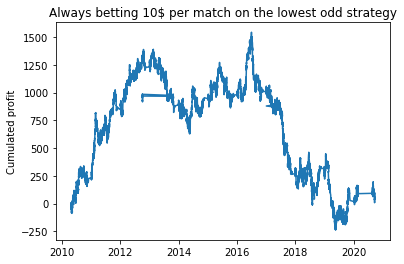

In [45]:
plt.title("Always betting 10$ per match on the lowest odd strategy")
plt.ylabel("Cumulated profit")
plt.plot(y)